## Notebook for first attempts with regression models

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit


### Load data

In [3]:
data_path = '' # Insert data path
data = pd.read_csv(data_path)

In [4]:
data.head()

,day,interval,detid,weekday,traffic
0,2015-05-15,0,CNTR_N00/005b1,Friday,6.0
1,2015-05-15,300,CNTR_N00/005b1,Friday,3.0
2,2015-05-15,600,CNTR_N00/005b1,Friday,5.0
3,2015-05-15,900,CNTR_N00/005b1,Friday,4.0
4,2015-05-15,1200,CNTR_N00/005b1,Friday,2.0


### Plot example data

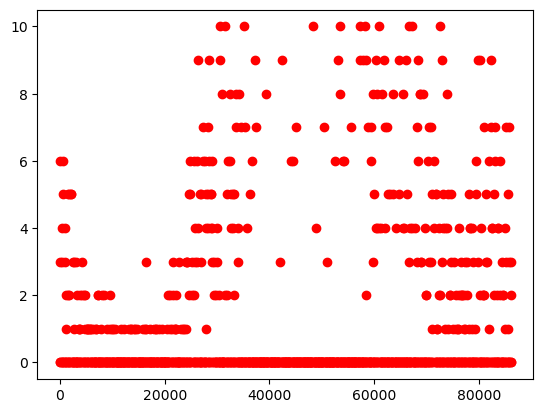

In [5]:
# Plot data of sensor 'CNTR_N00/005b1' on Friday
subset_data = data.loc[(data['detid'] == 'CNTR_N00/005b1') & (data['weekday'] == 'Friday')]
x_data, y_data = (subset_data['interval'], subset_data['traffic'])
plt.plot(x_data, y_data, 'ro')
plt.show()

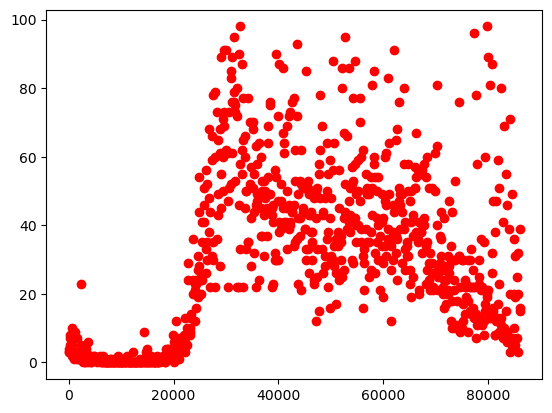

In [6]:
# Plot data of sensor 'CNTR_N01/405b1' on Monday
subset_data = data.loc[(data['detid'] == 'CNTR_N01/405b1') & (data['weekday'] == 'Monday')]
x_data, y_data = (subset_data['interval'], subset_data['traffic'])
plt.plot(x_data, y_data, 'ro')
plt.show()

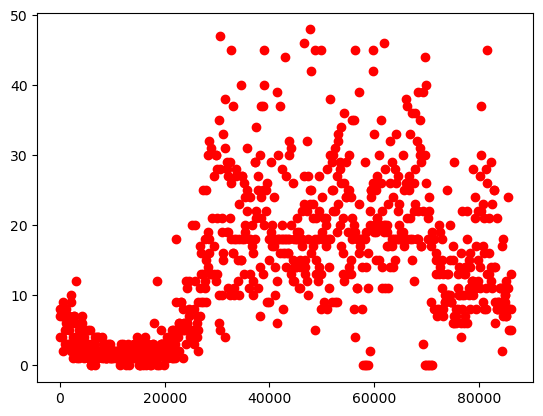

In [7]:
# Plot data of sensor 'CNTR_N01/302a1' on Monday
subset_data = data.loc[(data['detid'] == 'CNTR_N01/302a1') & (data['weekday'] == 'Monday')]
x_data, y_data = (subset_data['interval'], subset_data['traffic'])
plt.plot(x_data, y_data, 'ro')
plt.show()

### Try liniear regression

In [8]:
x = subset_data[['interval']]  
y = subset_data['traffic']    

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x)

# Fit the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

# Make predictions
y_pred = poly_reg_model.predict(X_poly)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Root Mean Squared Error: 7.850377654893955
R-squared: 0.45245264172262145


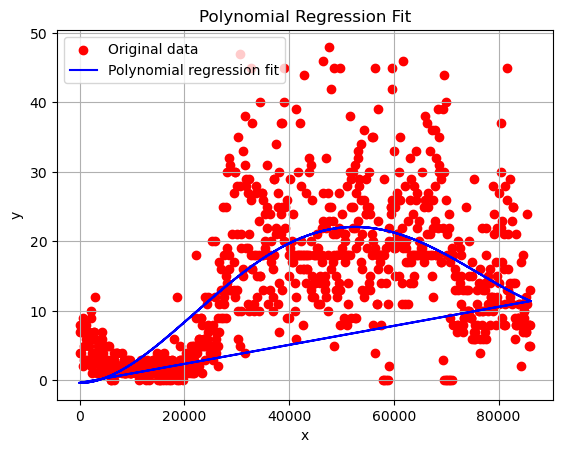

In [9]:
# Scatter plot of the original data
plt.scatter(x, y, color='red', label='Original data')

# Plot the polynomial regression line
plt.plot(x, y_pred, color='blue', label='Polynomial regression fit')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Optimal parameters:
a: -8.566172228137127e-09, b: 0.0009307683431456905, c: -4.804916995075577


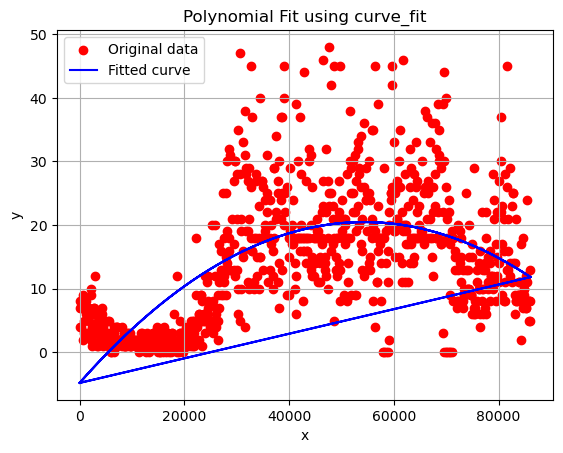

In [10]:
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

x = subset_data['interval'].values  # Convert to a 1D array
y = subset_data['traffic'].values

# Use curve_fit to fit the polynomial function to the data
params, covariance = curve_fit(polynomial, x, y)

# Get the optimal values for a, b, and c
a, b, c = params

print("Optimal parameters:")
print(f"a: {a}, b: {b}, c: {c}")

# Generate predictions using the fitted function
y_pred = polynomial(x, a, b, c)

# Scatter plot of the original data
plt.scatter(x, y, color='red', label='Original data')

# Plot the fitted polynomial function
plt.plot(x, y_pred, color='blue', label='Fitted curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit using curve_fit')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


### Try using curve fit

Optimal parameters:
a: -1.3938892822477617e-13, b: 9.498951901043535e-09, c: 0.00030595371656570605


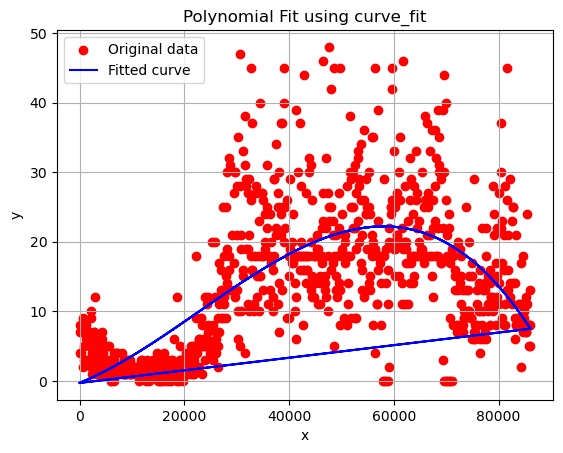

In [11]:

def polynomial(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*x + d

x = subset_data['interval'].values  # Convert to a 1D array
y = subset_data['traffic'].values

# Use curve_fit to fit the polynomial function to the data
params, covariance = curve_fit(polynomial, x, y)

# Get the optimal values for a, b, and c
a, b, c, d = params

print("Optimal parameters:")
print(f"a: {a}, b: {b}, c: {c}")

# Generate predictions using the fitted function
y_pred = polynomial(x, a, b, c, d)

# Scatter plot of the original data
plt.scatter(x, y, color='red', label='Original data')

# Plot the fitted polynomial function
plt.plot(x, y_pred, color='blue', label='Fitted curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit using curve_fit')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
